In [37]:
# basic data utils
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pal = sns.color_palette("hls", 10)

# Dimension reduction and clustering tools
import sklearn.cluster as cluster
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Metrics for how good a clustering does
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, classification_report, silhouette_score, accuracy_score, rand_score, confusion_matrix

In [5]:
test = pd.read_csv("data/sign_mnist_test.csv")
train = pd.read_csv('data/sign_mnist_train.csv')

In [6]:
print(f'Shape of train data: {train.shape}')
print(f'Shape of test data: {test.shape}')

Shape of train data: (27455, 785)
Shape of test data: (7172, 785)


In [7]:
label_test = test['label']
label_train = train['label']
train_data = train.drop('label',axis=1)
test_data = test.drop('label',axis=1)

In [8]:
# Display descriptive statistics for train dataset
print(f'Train descriptive stats {train.label.describe()}')
# Display descriptive statistics for test dataset
print(f'\nTest descriptive stats {test.label.describe()}')

Train descriptive stats count    27455.000000
mean        12.318813
std          7.287552
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: label, dtype: float64

Test descriptive stats count    7172.000000
mean       11.247351
std         7.446712
min         0.000000
25%         4.000000
50%        11.000000
75%        18.000000
max        24.000000
Name: label, dtype: float64


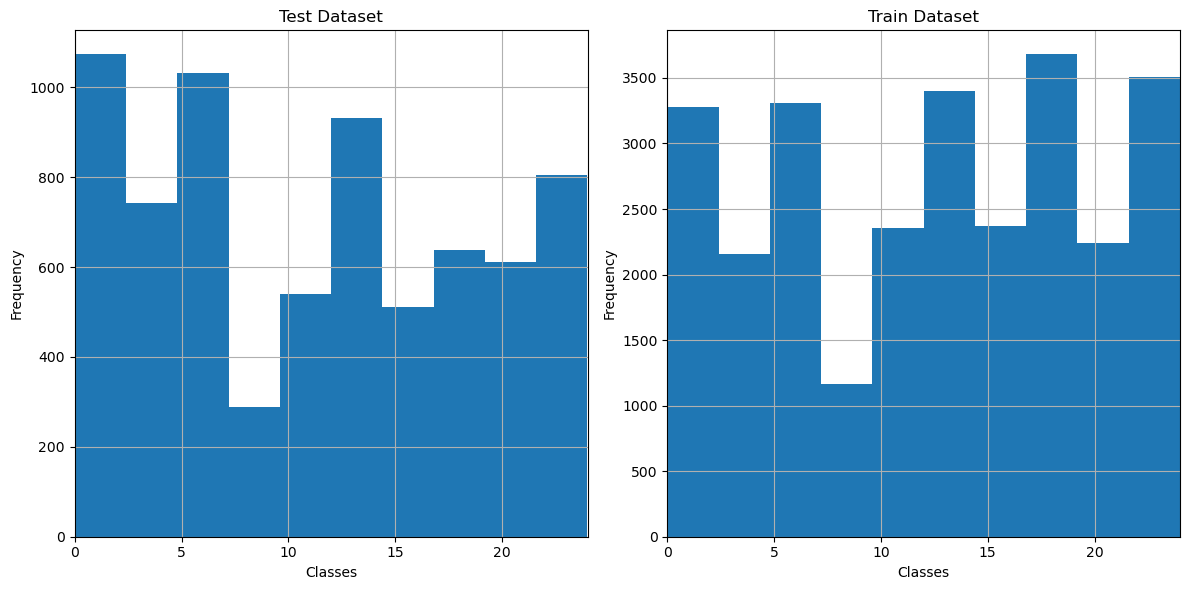

In [9]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram and display descriptive statistics for test dataset
test.label.hist(ax=axes[0])
axes[0].set_title('Test Dataset')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0,24)
axes[0].grid(True)

# Plot histogram and display descriptive statistics for train dataset
train.label.hist(ax=axes[1])
axes[1].set_title('Train Dataset')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0,24)
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


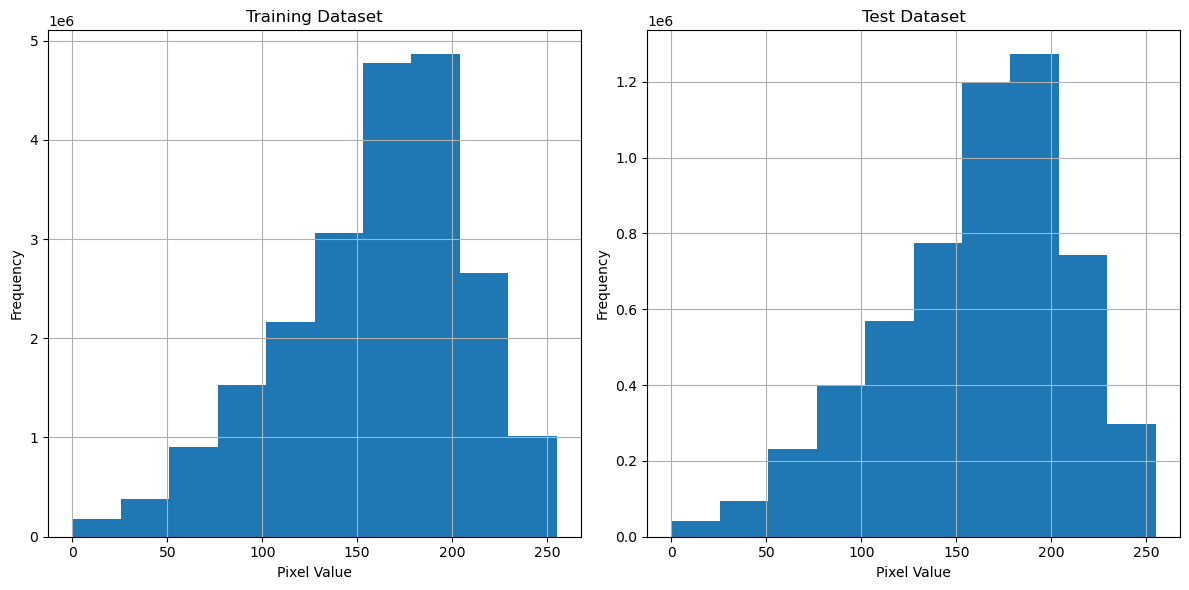

In [10]:
# Concatenate pixel values from both train and test datasets
pix_train = pd.Series(train_data.values.reshape(-1))
pix_test = pd.Series(test_data.values.reshape(-1))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram and display descriptive statistics for training dataset
pix_train.hist(ax=axes[0])
axes[0].set_title('Training Dataset')
axes[0].set_xlabel('Pixel Value')
axes[0].set_ylabel('Frequency')

# Plot histogram for test dataset
pix_test.hist(ax=axes[1])
axes[1].set_title('Test Dataset')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Display descriptive statistics for train dataset
print(f'Train pixel descriptive stats {pix_train.describe()}')
# Display descriptive statistics for test dataset
print(f'\nTest pixel descriptive stats {pix_test.describe()}')

Train pixel descriptive stats count    2.152472e+07
mean     1.592910e+02
std      4.876951e+01
min      0.000000e+00
25%      1.300000e+02
50%      1.670000e+02
75%      1.940000e+02
max      2.550000e+02
dtype: float64

Test pixel descriptive stats count    5.622848e+06
mean     1.605711e+02
std      4.904256e+01
min      0.000000e+00
25%      1.300000e+02
50%      1.690000e+02
75%      1.960000e+02
max      2.550000e+02
dtype: float64


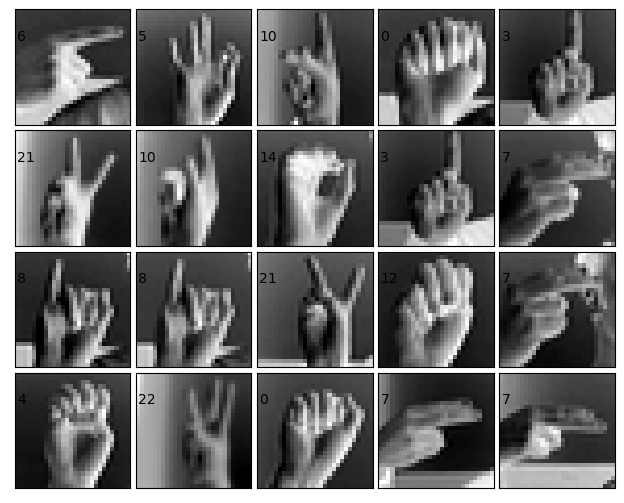

In [12]:
# examples of the raw data

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # data is 28 x 28 pixels, grayscale
    ax.imshow(test_data.loc[i].to_numpy().reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(test.label.loc[i]))

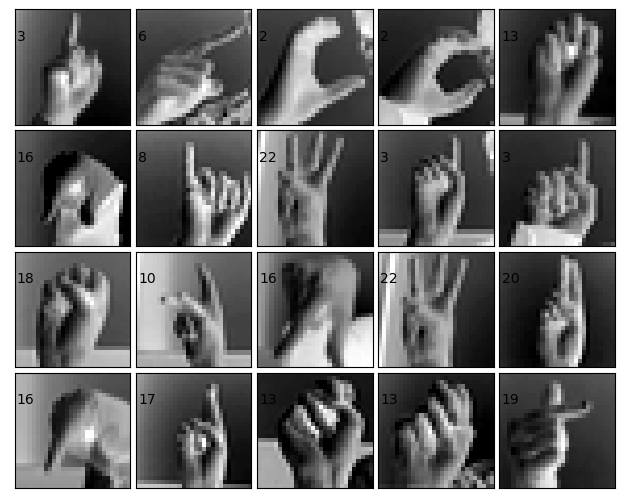

In [13]:
# examples of the raw data

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # data is 28 x 28 pixels, grayscale
    ax.imshow(train_data.loc[i].to_numpy().reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(train.label.loc[i]))

### Tasks
1. PCA / kPCA dimensionality reduction
 
2. Classification via SVM (which uses all the components in sklearn)

In [40]:
# Separate features (pixels) and labels (alphabet)
X_train = train.drop('label', axis=1)
y_train = train['label']

X_test = test.drop('label', axis=1)
y_test = test['label']

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm = SVC(kernel='rbf', gamma='scale', C=1.0)
svm.fit(X_train_pca, y_train)

# Predict labels for test data
y_pred = svm.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Perform  PCA on test data
X_test_data_pca = pca.transform(X_test)

# Predict labels for test data
predicted_alphabet = svm.predict(X_test_data_pca)

Accuracy: 0.855967651979922
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.99      0.99       432
           2       0.85      0.99      0.92       310
           3       0.92      1.00      0.96       245
           4       0.95      1.00      0.97       498
           5       0.75      0.84      0.79       247
           6       0.94      0.91      0.93       348
           7       0.97      0.95      0.96       436
           8       0.81      0.91      0.86       288
          10       0.82      0.68      0.74       331
          11       0.87      0.96      0.91       209
          12       0.86      0.75      0.80       394
          13       0.91      0.69      0.78       291
          14       0.99      0.85      0.91       246
          15       1.00      1.00      1.00       347
          16       1.00      0.99      1.00       164
          17       0.34      0.62      0.44       144

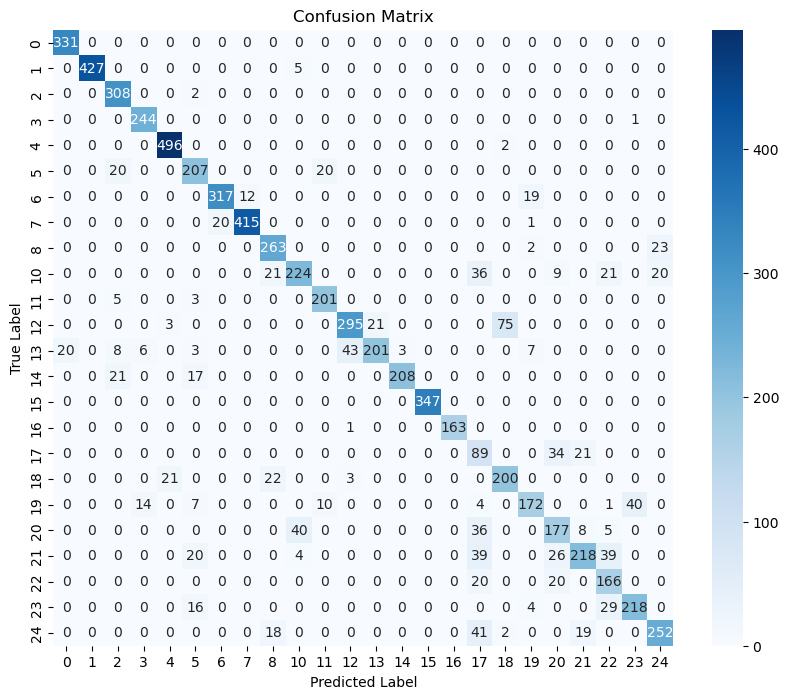

In [41]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Calculate Adjusted Rand Index
ari = adjusted_rand_score(y_test, y_pred)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.7753224948875098


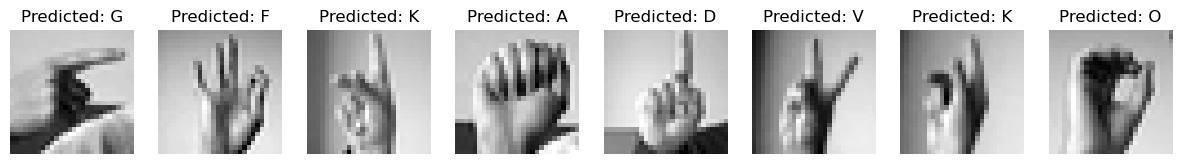

In [43]:
import string

# Define a dictionary to map numeric labels to alphabet letters
alphabet_mapping = {i: letter for i, letter in enumerate(string.ascii_uppercase)}

# Define a function to display images with their predicted alphabet letters
def display_images_with_predictions(images_df, predictions, num_images=8):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        image = images_df.iloc[i].to_numpy().reshape(28, 28)  # Convert DataFrame row to NumPy array and reshape
        axes[i].imshow(image, cmap='gray')
        predicted_letter = alphabet_mapping[predictions[i]]  # Get the predicted alphabet letter
        axes[i].set_title(f"Predicted: {predicted_letter}")
        axes[i].axis('off')
    plt.show()

# Display images and their predicted alphabet
display_images_with_predictions(X_test, predicted_alphabet)